In [1]:
# import packages

import pandas as pd
import numpy as np
from numpy.random import randn
from pandas import Series,DataFrame

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# import files

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

(array([  5.,  11.,  13.,  61.,  58., 126., 165., 180., 122., 130., 121.,
         78.,  61.,  64.,  49.,  36.,  36.,  25.,  13.,  25.,  16.,  11.,
          4.,  11.,   9.,   5.,   4.,   4.,   4.,   2.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <a list of 50 Patch objects>)

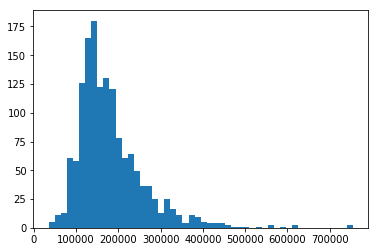

In [2]:
# Step 1 - Target Data

# Let us look at the distribution of the SalePrice in the train dataset

plt.hist(train.SalePrice, bins=50)

C:\Users\Danny\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


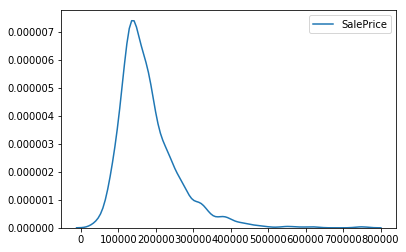

In [3]:
sns.kdeplot(train.SalePrice)

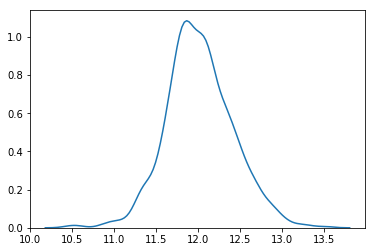

In [4]:
# Looking at this we see that it is right skewed, the regression analysis works best with normally
# distributed data, let us now transform it

import math

norm = [math.log(y) for y in train.SalePrice]

sns.kdeplot(norm)

In [5]:
# This is now much better distributed, let us change the training dataset accordingly

train['SaleLog'] = norm

train.drop('SalePrice',axis=1,inplace=True)

In [6]:
# Step 2 - Data Clean Up

# First we need to drop the Id column

train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [7]:
# Number of missing values in each column of training data
missing_val_count_by_column = (train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [8]:
# Number of missing values in each column of testing data
missing_val_count_by_column = (test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [9]:
# There is lots of missing data, let us sort through, details are excluded here as they are long
# and not very interesting. It consists of going through the data descriptions and seeing what NA
# stands for, then chosing the appropiate changes

train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))
train['Alley'].fillna(value='NA',inplace=True)
train['MasVnrType'].fillna(value='None',inplace=True)
train['MasVnrArea'].fillna(0,inplace=True)
train['BsmtQual'].fillna(value='No',inplace=True)
train['BsmtCond'].fillna(value='NA',inplace=True)
train['BsmtExposure'].fillna(value='No',inplace=True)
train['BsmtFinType1'].fillna(value='No',inplace=True)
train['BsmtFinType2'].fillna(value='NA',inplace=True) 
train['Electrical'].fillna(value='SBrkr',inplace=True) 
train['FireplaceQu'].fillna(value='NA',inplace=True)
train['GarageType'].fillna(value='NA',inplace=True)  
train['GarageYrBlt'].fillna(value=train['GarageYrBlt'].median(),inplace=True)                  
train['GarageFinish'].fillna(value='NA',inplace=True)                         
train['GarageQual'].fillna(value='NA',inplace=True)                           
train['GarageCond'].fillna(value='NA',inplace=True)                           
train['PoolQC'].fillna(value='NA',inplace=True)
train['Fence'].fillna(value='NA',inplace=True)
train['MiscFeature'].fillna(value='NA',inplace=True)

In [10]:
# Do the same for the test set

test["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
test['Alley'].fillna(value='NA',inplace=True)
test['MasVnrType'].fillna(value='None',inplace=True)
test['MasVnrArea'].fillna(0,inplace=True)
test['BsmtQual'].fillna(value='No',inplace=True)
test['BsmtCond'].fillna(value='NA',inplace=True)
test['BsmtExposure'].fillna(value='No',inplace=True)
test['BsmtFinType1'].fillna(value='No',inplace=True)                     
test['BsmtFinType2'].fillna(value='NA',inplace=True)
test['Electrical'].fillna(value='SBrkr',inplace=True) 
test['FireplaceQu'].fillna(value='NA',inplace=True)
test['GarageType'].fillna(value='NA',inplace=True)  
test['GarageYrBlt'].fillna(value=train['GarageYrBlt'].median(),inplace=True)                  
test['GarageFinish'].fillna(value='NA',inplace=True)                         
test['GarageQual'].fillna(value='NA',inplace=True)                           
test['GarageCond'].fillna(value='NA',inplace=True)                                                    
test['PoolQC'].fillna(value='NA',inplace=True)
test['Fence'].fillna(value='NA',inplace=True)
test['MiscFeature'].fillna(value='NA',inplace=True)

In [11]:
test['MSZoning'] = test.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
train.drop('Utilities',axis=1,inplace=True)
test.drop('Utilities',axis=1,inplace=True)
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
for col in ('BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'):
    test[col] = test[col].fillna(0)
test['KitchenQual'] = test['KitchenQual'].fillna("TA")
test['Functional'] = test['Functional'].fillna('Typ')
for col in ('GarageCars','GarageArea'):
    test[col]=test[col].fillna(0)
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])

In [12]:
# Some data should be converted to strings as that represents the data better

test['MSSubClass'] = test['MSSubClass'].apply(str)
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

train['MSSubClass'] = train['MSSubClass'].apply(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

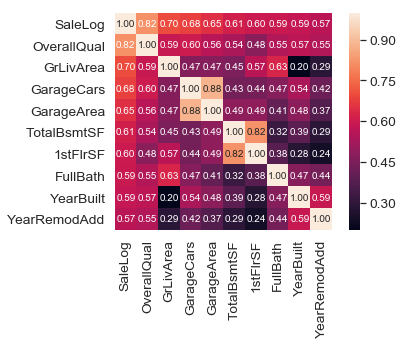

In [13]:
# Step 3 - Outliers

# Remvoing outliers can be a dangerous decision, first look at which of the columns has the highest
# correlation to SaleLog and only remove a few outliers where really required

corrmat = train.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SaleLog')['SaleLog'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

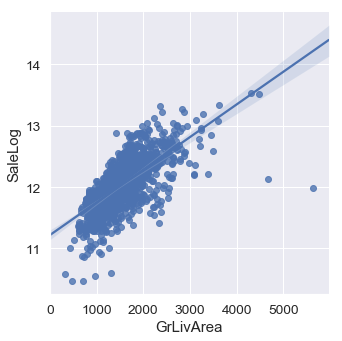

In [14]:
# The continiuos data column with the highest correlation is GrLivArea

sns.lmplot(y='SaleLog',x='GrLivArea',data=train)

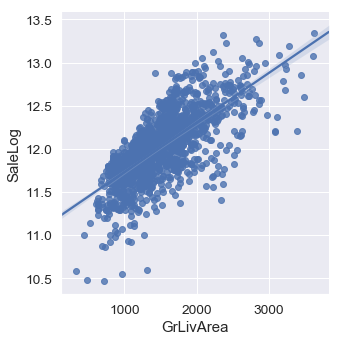

In [15]:
# Let us remove the outliers

train = train.drop(train[(train['GrLivArea']>4000)].index)

sns.lmplot(y='SaleLog',x='GrLivArea',data=train)

In [16]:
# Step 4 - Skewness

# We would like our data to be normally distributed, that is, all numerical data to be normally
# distrubed

# First we have to join up the training and testing data for this

train_features = train.drop(['SaleLog'], axis=1)
test_features = test

features = pd.concat([train_features, test_features]).reset_index(drop=True)

features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,FR2,Gtl,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,Corner,Gtl,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,FR2,Gtl,...,0,0,NA,NA,NA,0,12,2008,WD,Normal


In [17]:
from scipy.stats import skew

numerical_features = features.select_dtypes(exclude = ["object"]).columns

feat_num = features[numerical_features]

skewness = feat_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          21.932147
PoolArea         18.701829
LotArea          13.123758
LowQualFinSF     12.080315
3SsnPorch        11.368094
KitchenAbvGr      4.298845
BsmtFinSF2        4.142863
EnclosedPorch     4.000796
ScreenPorch       3.943508
BsmtHalfBath      3.942892
MasVnrArea        2.600697
OpenPorchSF       2.529245
LotFrontage       1.901386
WoodDeckSF        1.848285
1stFlrSF          1.253011
GrLivArea         0.977860
BsmtFinSF1        0.974138
BsmtUnfSF         0.920135
2ndFlrSF          0.843237
TotRmsAbvGrd      0.749579
Fireplaces        0.725958
HalfBath          0.698770
TotalBsmtSF       0.662657
BsmtFullBath      0.622820
OverallCond       0.569143
BedroomAbvGr      0.328129
GarageArea        0.217748
OverallQual       0.181902
FullBath          0.159917
GarageCars       -0.219402
GarageYrBlt      -0.403002
YearRemodAdd     -0.449113
YearBuilt        -0.598087
dtype: float64

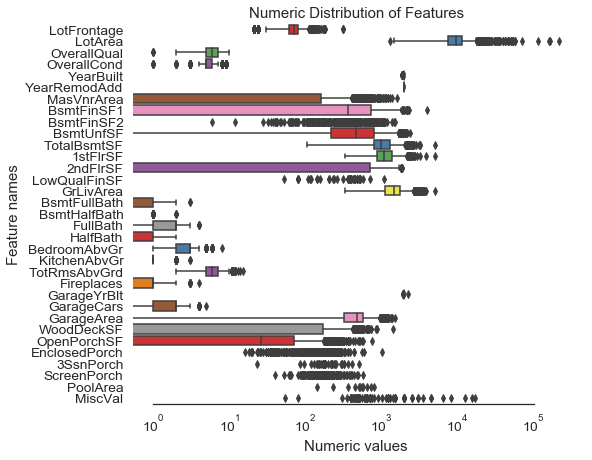

In [18]:
# Box plots for all our numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=features[numerical_features] , orient="h", palette="Set1")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [19]:
# The most skewed features are due to lots of zero values
features.PoolArea.value_counts()

0      2904
561       1
519       1
800       1
738       1
648       1
576       1
512       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

In [20]:
high_skew = skewness[skewness > 0.5]

import scipy

skew_index = high_skew.index

for i in skew_index:
    features[i] = scipy.special.boxcox1p(features[i], scipy.stats.boxcox_normmax(features[i] + 1))

feat_num = features[numerical_features]

skewness = feat_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

PoolArea         16.290037
3SsnPorch         8.858944
LowQualFinSF      8.489627
MiscVal           5.236070
BsmtHalfBath      3.790877
KitchenAbvGr      3.776776
ScreenPorch       3.151351
BsmtFinSF2        2.577190
EnclosedPorch     2.148107
MasVnrArea        0.977442
2ndFlrSF          0.892739
WoodDeckSF        0.786377
HalfBath          0.734482
OpenPorchSF       0.621703
BsmtFullBath      0.616950
Fireplaces        0.553409
OverallCond       0.382277
BsmtFinSF1        0.365567
BedroomAbvGr      0.328129
TotalBsmtSF       0.295280
GarageArea        0.217748
OverallQual       0.181902
FullBath          0.159917
BsmtUnfSF         0.054250
TotRmsAbvGrd      0.047100
GrLivArea         0.008765
LotFrontage       0.008189
1stFlrSF         -0.008533
LotArea          -0.139164
GarageCars       -0.219402
GarageYrBlt      -0.403002
YearRemodAdd     -0.449113
YearBuilt        -0.598087
dtype: float64

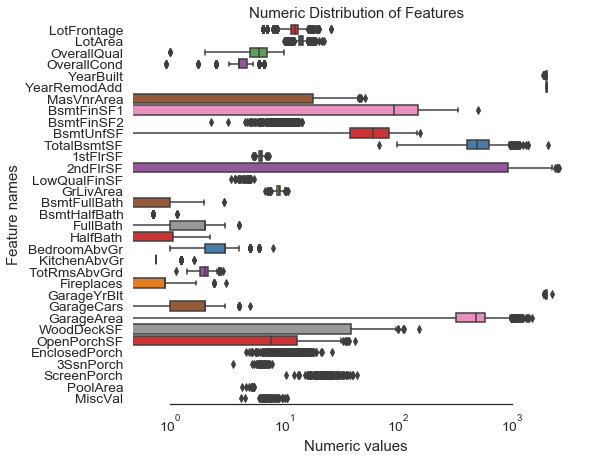

In [21]:
# Box plots for all our numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=features[numerical_features] , orient="h", palette="Set1")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [22]:
# This has improved most of the numerical features, the obvious ones left to deal with are

# MasVnrArea **
# BsmtFinSF1 **
# 2ndFlrSF **
# BsmtFullBath
# HalfBath
# Fireplaces
# WoodDeckSF **
# OpenPorchSF **

# The stared ones are the most badly distributed and will be dropped, before that occurs let us
# create additional features to include some of this data

In [23]:
#  Adding total sqfootage feature 
features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

#  Adding total bathrooms feature
features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))

#  Adding total porch sqfootage feature
features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF'])

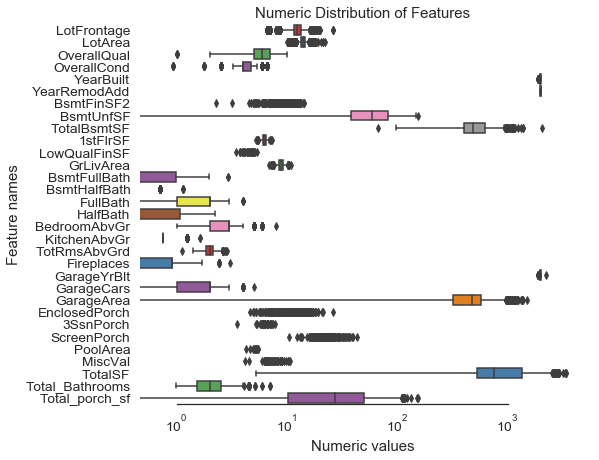

In [24]:
features.drop(['MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtFinSF1','2ndFlrSF'], axis=1,inplace=True)

numerical_features = features.select_dtypes(exclude = ["object"]).columns

# Box plots for all our numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=features[numerical_features] , orient="h", palette="Set1")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [25]:
# Added has pool, let us add other features

features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

In [26]:
# Step 5 - Splitting Categorical data

# For the machine learning programs to work, we have to change the categorical data

In [27]:
s = (features.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [28]:
final_features = pd.get_dummies(features).reset_index(drop=True)
print('Features size:', features.shape)
final_features.head()

Features size: (2915, 80)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,11.986207,13.814182,7,3.991272,2003,2003,0.0,29.982199,428.729533,6.023669,...,0,0,0,1,0,0,0,0,1,0
1,13.322351,14.098354,6,5.999564,1976,1976,0.0,44.120317,603.262935,6.328750,...,0,0,0,1,0,0,0,0,1,0
2,12.266153,14.456065,7,3.991272,2001,2002,0.0,56.875261,456.812871,6.080637,...,0,0,0,1,0,0,0,0,1,0
3,11.503227,14.086662,7,3.991272,1915,1970,0.0,64.783549,384.328561,6.115019,...,0,0,0,1,1,0,0,0,0,0
4,13.654602,15.000187,8,3.991272,2000,2000,0.0,61.142946,553.779125,6.252659,...,0,0,0,1,0,0,0,0,1,0


In [29]:
# split back into training and testing

y = train.SaleLog

X = final_features.iloc[:len(y), :]
X_test = final_features.iloc[len(X):, :]
print('Features size for train(X,y) and test(X_test):')
print('X', X.shape, 'y', y.shape, 'X_test', X_test.shape)

Features size for train(X,y) and test(X_test):
X (1456, 330) y (1456,) X_test (1459, 330)


In [30]:
# Step 6 - Modelling

In [31]:
# import libraries

from sklearn.linear_model import ElasticNetCV, LassoCV
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, RidgeCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [32]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=10)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [34]:
alphas_ridge = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]

ridge = RidgeCV(alphas=alphas_ridge, cv=kfolds)

In [35]:
ridge.fit(X_train,y_train)

pred_log = ridge.predict(X_valid)

pred = [np.exp(t) for t in pred_log]

valid_exp = [np.exp(t) for t in y_valid]

mean_absolute_error(valid_exp,pred)

12604.220741435014

In [36]:
from lightgbm import LGBMRegressor

lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4, #was 3
                                       learning_rate=0.01, 
                                       n_estimators=4900,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2, # 'was 0.2'
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

lightgbm.fit(X_train,y_train)

pred_log = lightgbm.predict(X_valid)

pred = [np.exp(t) for t in pred_log]

valid_exp = [np.exp(t) for t in y_valid]

mean_absolute_error(valid_exp,pred)

13677.671345526916

In [37]:
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
lasso = LassoCV(max_iter=1e7, alphas=alphas2,random_state=12, cv=kfolds)
lasso.fit(X_train,y_train)

pred_log = lasso.predict(X_valid)

pred = [np.exp(t) for t in pred_log]

valid_exp = [np.exp(t) for t in y_valid]

mean_absolute_error(valid_exp,pred)

12678.752198401271

In [38]:
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]

e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elec = ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio)

elec.fit(X_train,y_train)

pred_log = elec.predict(X_valid)

pred = [np.exp(t) for t in pred_log]

valid_exp = [np.exp(t) for t in y_valid]

mean_absolute_error(valid_exp,pred)

12678.752198401271

In [39]:
gboost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
gboost.fit(X_train,y_train)

pred_log = gboost.predict(X_valid)

pred = [np.exp(t) for t in pred_log]

valid_exp = [np.exp(t) for t in y_valid]

mean_absolute_error(valid_exp,pred)

13743.780212917576

In [40]:
my_model = xgb.XGBRegressor(n_estimators=700)

my_model.fit(X_train, y_train)

pred_log = my_model.predict(X_valid)

pred = [np.exp(t) for t in pred_log]

valid_exp = [np.exp(t) for t in y_valid]

mean_absolute_error(valid_exp,pred)

C:\Users\Danny\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:23:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


14807.518715218315

In [41]:
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]

elec = ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio)

elec.fit(X_train,y_train)

pred_log = elec.predict(X_valid)

pred = [np.exp(t) for t in pred_log]

valid_exp = [np.exp(t) for t in y_valid]

mean_absolute_error(valid_exp,pred)

12678.752198401271

In [42]:
# elec and lasso same result, combine lasso, ridge and lass so lightgbm and gradient boosting

def blend_models_1(X):
    return (0.5*(ridge.predict(X))+0.10*(lightgbm.predict(X))+0.30*(lasso.predict(X))+
            0.10*(gboost.predict(X)))

In [43]:
ridge.fit(X_train,y_train)
lightgbm.fit(X_train,y_train)
lasso.fit(X_train,y_train)
gboost.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto', random_state=5,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [44]:
blend = blend_models_1(X_valid)

pred = [np.exp(t) for t in blend]

valid_exp = [np.exp(t) for t in y_valid]

mean_absolute_error(valid_exp,pred)

12419.143626953453

In [45]:
ridge.fit(X,y)
lightgbm.fit(X,y)
lasso.fit(X,y)
gboost.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto', random_state=5,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [46]:
blend = blend_models_1(X_test)

In [47]:
pred = [np.exp(t) for t in blend]

new_test =pd.read_csv('test.csv')

submission = DataFrame({'Id':new_test['Id'],'SalePrice':pred})

In [48]:
submission.to_csv('housing_sub_blend_1.csv')